In [3]:
# General imports
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from matplotlib.offsetbox import AnchoredText

#Astropy imports
import astropy.units as u
import astropy.constants as const
from astropy.cosmology import Planck18 as cosmo

#Diffuse IceCube observations
from Diffuse_IceCube_data.diffuse_icecube_data import *

# Own code imports
from xi_calc import *

from diffuse_lirg_extrapolation import(
    complete_dataframe,
    generation_rate_diff,
    QIR,
    Rp,
    nuflux,
    normalizing_factor
)

from diffuse_lirg_fit import(
    nuflux_fit,
    fit_eta_vs_fpp
)



In [4]:
df = pd.read_csv('./Dataframes/Individual/dataframe.csv') #contains IR luminosity per targeted galaxy

# Estimating the IR generation rate of the GOALS sample

In [5]:
help(QIR)

Help on function QIR in module diffuse_lirg_extrapolation:

QIR(DL_compl, AGNcorr, df)
    Computes the IR luminosity density (Q_IR) within a given completeness distance.
    
    Parameters:
    - DL_compl (float): Completeness distance in Mpc.
    - AGNcorr (str): 'yes' or 'no' to apply AGN luminosity correction.
    
    Returns:
    - List with two values:
        1. IR luminosity density [erg Mpc^-3 yr^-1]
        2. Total IR luminosity [erg yr^-1]



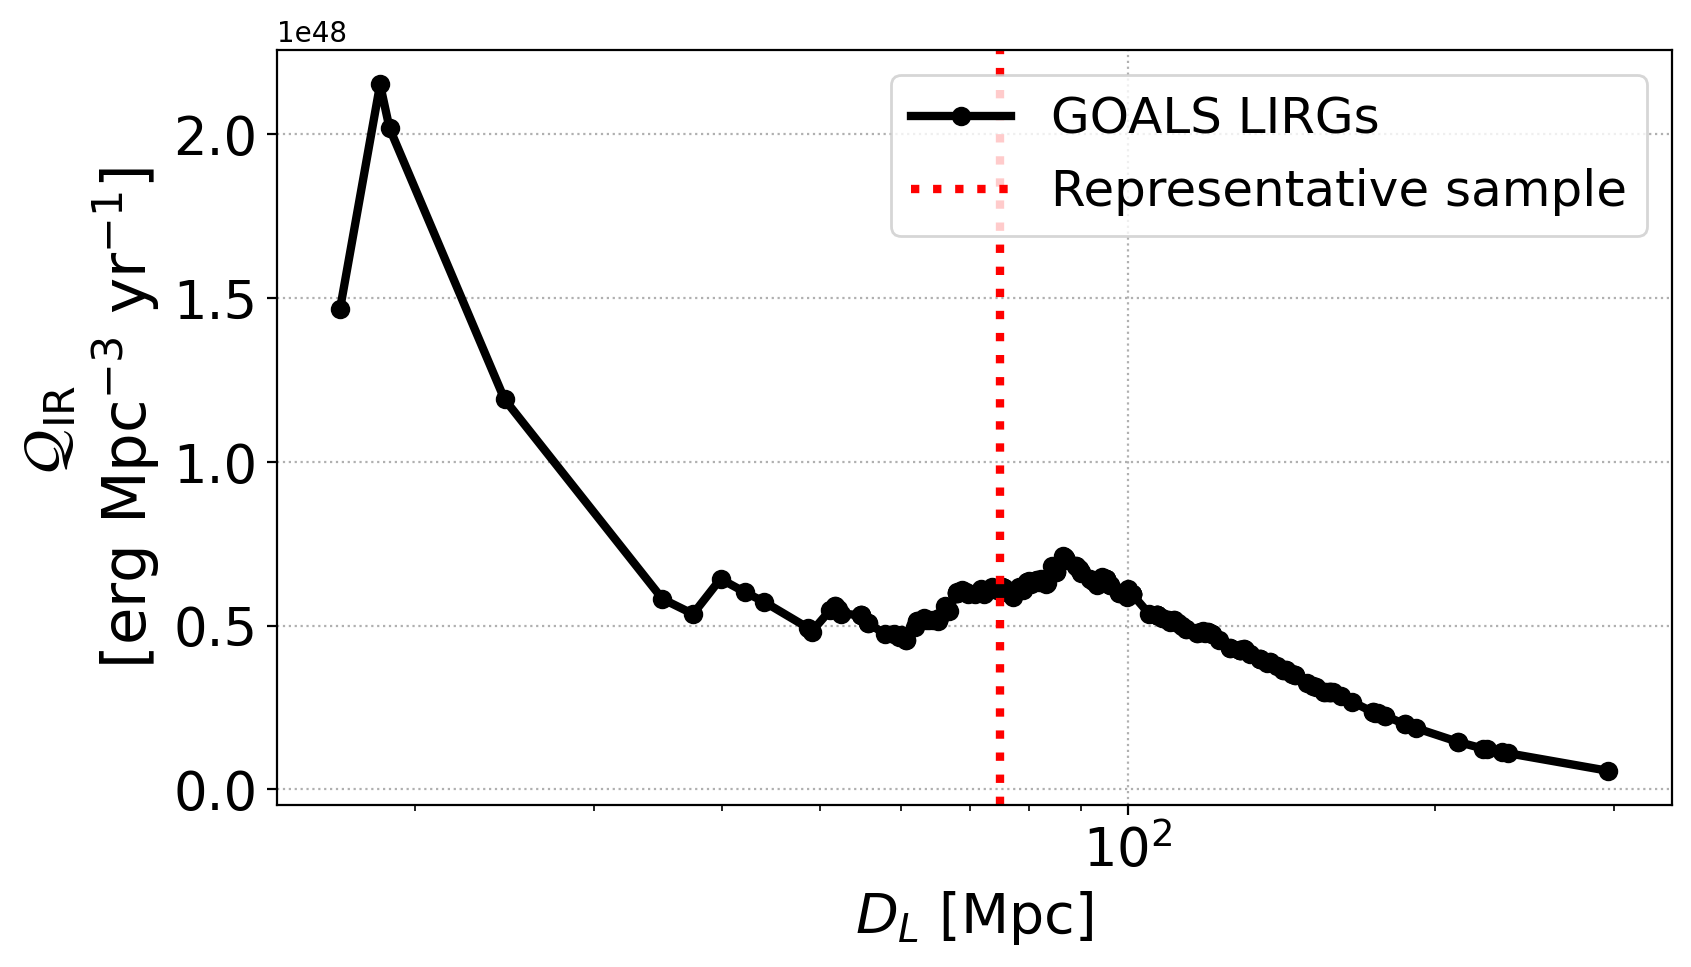

In [6]:
# Generate completeness-filtered dataframe
df_LIRG = complete_dataframe(DL_compl=1000,df=df)#1000 just to get all of them

# Define a range of distances just above each value
Dmax_range_LIRG = df_LIRG.sort_values(by='D_L [Mpc]')['D_L [Mpc]'].to_numpy() + 1

# Compute Q_IR across these distances, with and without AGN correction
QIR_LIRG_individual = [QIR(d, 'no',df)[0] for d in Dmax_range_LIRG]

# Plot Q_IR vs D_L for LIRGs
plt.figure(figsize=(9, 5), dpi=200)

plt.plot(Dmax_range_LIRG, QIR_LIRG_individual, 
         color='black', marker='o', linestyle='-', label='GOALS LIRGs', linewidth=3)

plt.axvline(x=75, color='red', linestyle='dotted', linewidth=3, label='Representative sample')

plt.xscale('log')
plt.grid(ls='dotted')

# Axis labels with LaTeX
plt.xlabel('$D_L$ [Mpc]', fontsize=20)
plt.ylabel('$\\mathcal{Q}_{\\mathrm{IR}}$ \n [erg Mpc$^{-3}$ yr$^{-1}$]', fontsize=22)

# Formatting
plt.xticks(fontsize=19)
plt.yticks(fontsize=19)
plt.legend(fontsize=18)


# Redshift evolution parameter $\xi(z)$

In [7]:
z_range = np.arange(0,4,0.01)
xi_U_2 = [xi(2,i,'ULIRG') for i in z_range]
xi_SFR_2 = [xi(2,i,'starforming') for i in z_range]
xi_flat_2 = [xi(2,i,'flat') for i in z_range]

xi_U_3 = [xi(3,i,'ULIRG') for i in z_range]
xi_SFR_3 = [xi(3,i,'starforming') for i in z_range]
xi_flat_3 = [xi(3,i,'flat') for i in z_range]

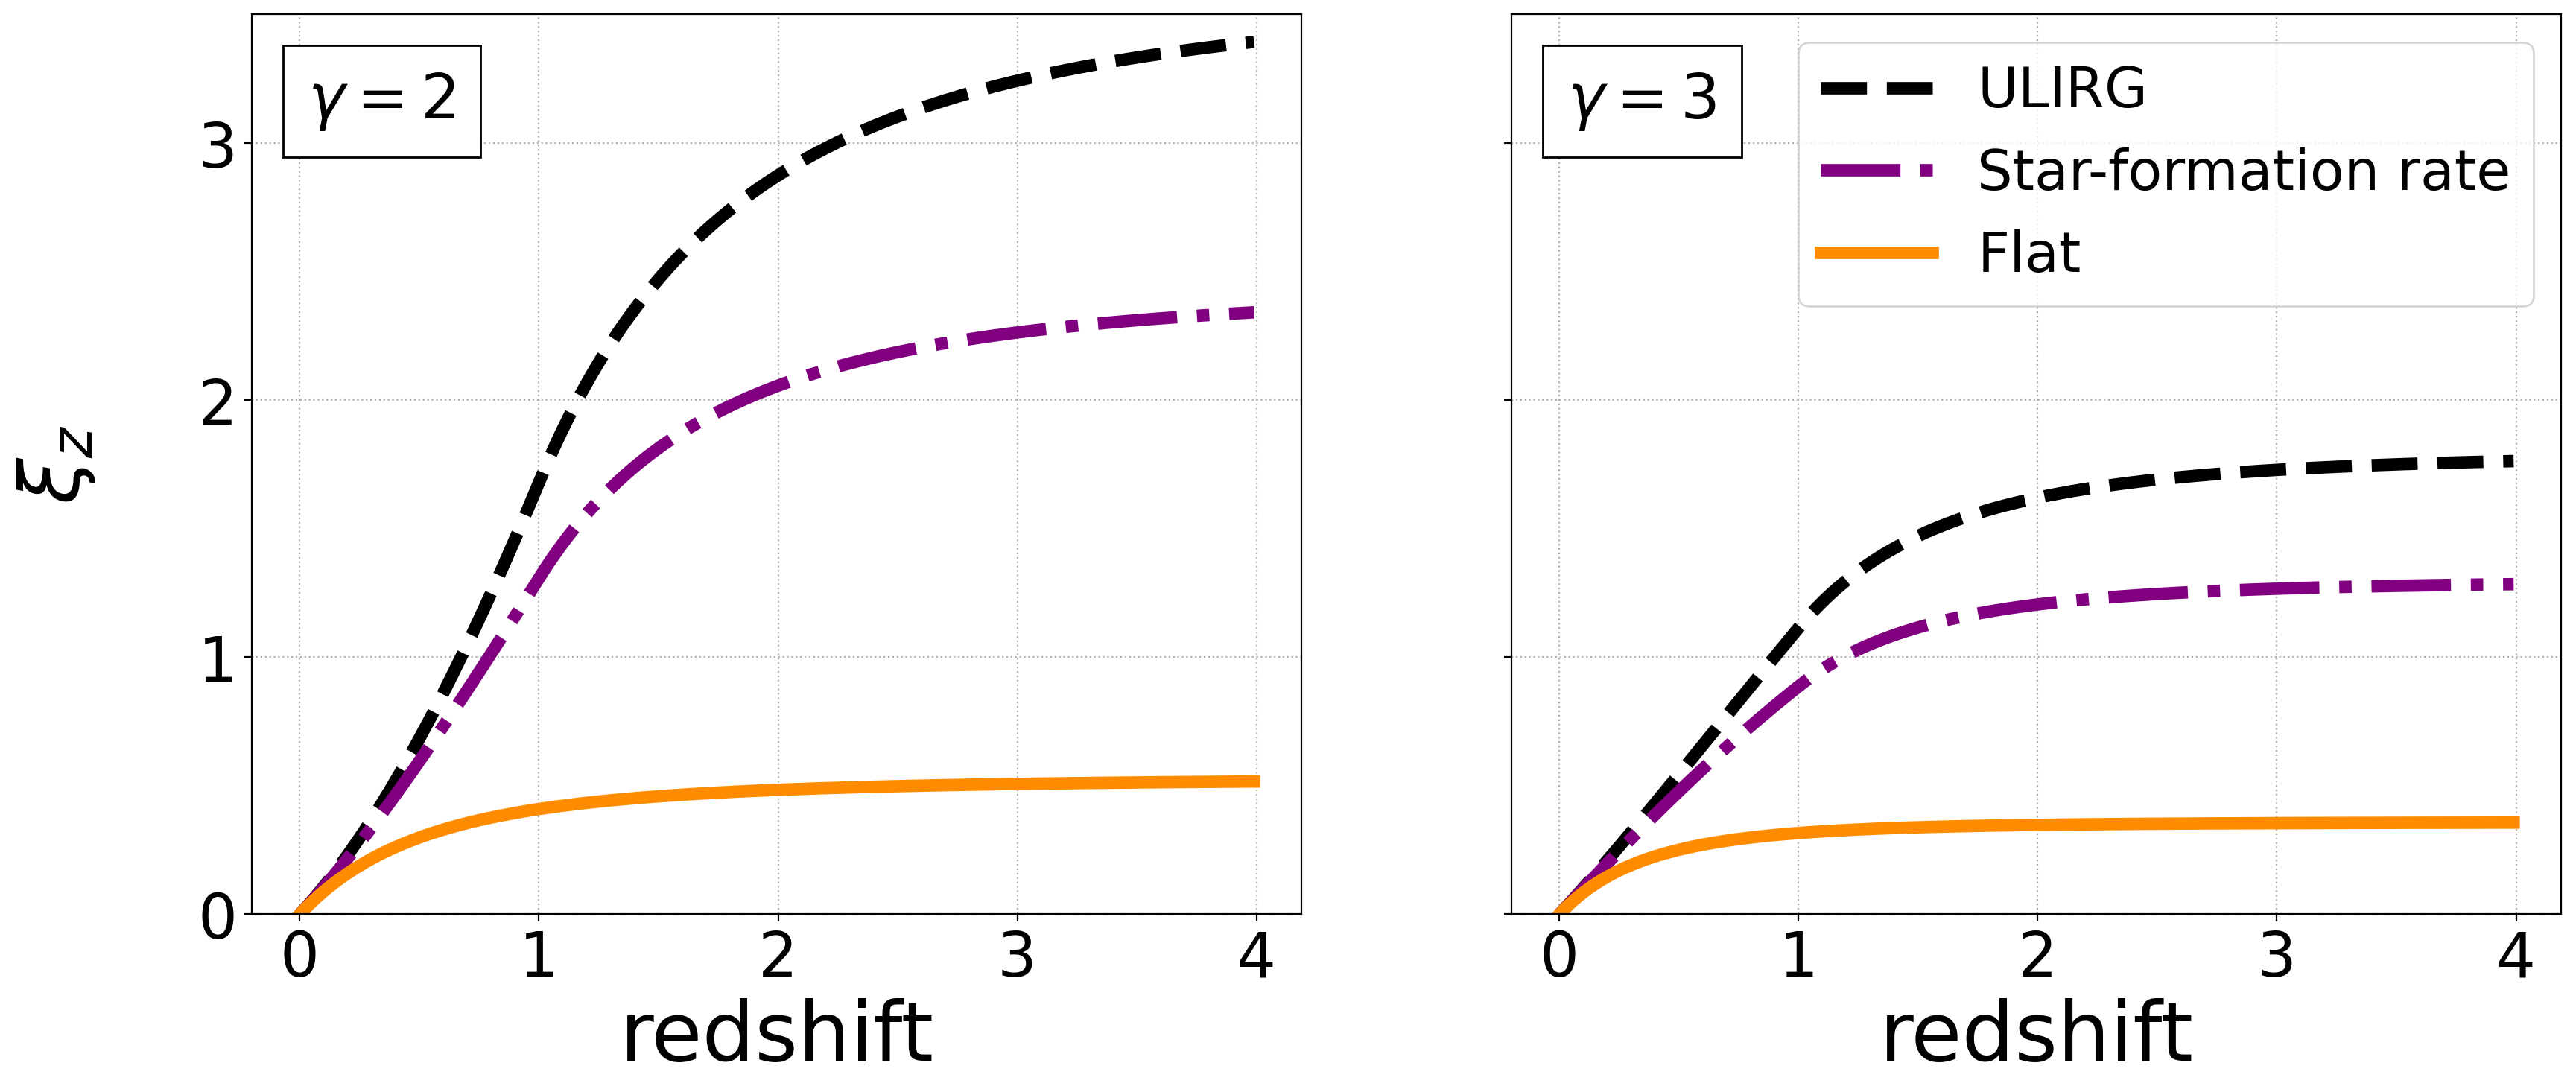

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(20,8),dpi = 200,sharey=True)
lw=6

ax[0].plot(z_range,xi_U_2, color='black', label = 'ULIRG', linestyle = '--', linewidth = lw)
ax[0].plot(z_range,xi_SFR_2, color='purple', label = 'Star-formation rate',linestyle ='-.', linewidth = lw)
ax[0].plot(z_range,xi_flat_2, color='darkorange', label = 'Flat',linewidth =  lw)
ax[0].set_yticks(np.linspace(0,4,5))
ax[1].plot(z_range,xi_U_3, color='black', label = 'ULIRG', linestyle = '--',linewidth = lw)
ax[1].plot(z_range,xi_SFR_3, color='purple', label =  'Star-formation rate', linestyle = '-.',linewidth = lw)
ax[1].plot(z_range,xi_flat_3, color='darkorange', label = 'Flat',linewidth = lw)
ax[1].set_ylim(0,3.5)

ax[0].tick_params(axis='both', which='major', labelsize=30)
ax[0].tick_params(axis='both', which='major', labelsize=30)
ax[1].tick_params(axis='both', which='major', labelsize=30)
ax[1].tick_params(axis='both', which='major', labelsize=30)

ax[0].set_ylabel('$\\xi_z$\n', fontsize = 40)
ax[0].set_xlabel('redshift', fontsize = 40)
ax[1].set_xlabel('redshift', fontsize = 40)

#ax[0].legend(fontsize = 20)
ax[1].legend(fontsize = 27)


ax[0].grid(ls='dotted')
ax[1].grid(ls='dotted')

box_text_size = 30
anchored_text_l = AnchoredText('$\gamma=2$', loc= 'upper left',
                                     prop=dict(size=box_text_size))

box_text_size = 30
anchored_text_r = AnchoredText('$\gamma=3$', loc= 'upper left',
                                     prop=dict(size=box_text_size))
ax[0].add_artist(anchored_text_l)
ax[1].add_artist(anchored_text_r)




In [9]:
gamma_range = np.arange(2,3,0.01)
xi_U_z4 = [xi(i,4,'ULIRG') for i in gamma_range]
xi_SFR_z4 = [xi(i,4,'starforming') for i in gamma_range]
xi_flat_z4 = [xi(i,4,'flat') for i in gamma_range]
xi_U_z1 = [xi(i,1,'ULIRG') for i in gamma_range]
xi_SFR_z1 = [xi(i,1,'starforming') for i in gamma_range]
xi_flat_z1 = [xi(i,1,'flat') for i in gamma_range]

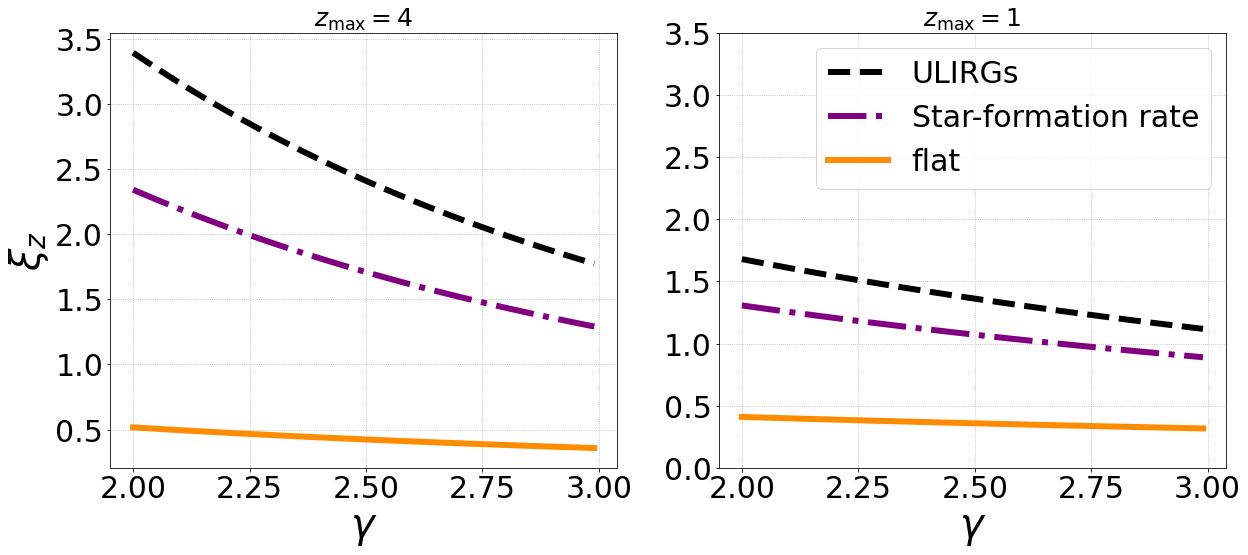

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
lw=6

ax[0].plot(gamma_range,xi_U_z4, color='k', label = 'ULIRGs', linestyle = '--', linewidth = lw)
ax[0].plot(gamma_range,xi_SFR_z4, color='purple', label = 'Star-formation rate',linestyle ='-.', linewidth = lw)
ax[0].plot(gamma_range,xi_flat_z4, color='darkorange', label = 'flat',linewidth = lw )
ax[1].plot(gamma_range,xi_U_z1, color='k', label = 'ULIRGs', linestyle = '--',linewidth = lw)
ax[1].plot(gamma_range,xi_SFR_z1, color='purple', label = 'Star-formation rate', linestyle = '-.',linewidth = lw)
ax[1].plot(gamma_range,xi_flat_z1, color='darkorange', label = 'flat',linewidth =lw)
ax[1].set_ylim(0,3.5)
ax[0].tick_params(axis='both', which='major', labelsize=30)
ax[0].tick_params(axis='both', which='major', labelsize=30)
ax[1].tick_params(axis='both', which='major', labelsize=30)
ax[1].tick_params(axis='both', which='major', labelsize=30)

ax[0].set_ylabel('$\\xi_z$', fontsize = 40)
ax[0].set_xlabel('$\gamma$', fontsize = 40)
ax[1].set_xlabel('$\gamma$', fontsize = 40)

#ax[0].legend(fontsize = 20)
ax[1].legend(fontsize = 30)

ax[0].set_title('$z_{\mathrm{max}} = 4$', fontsize = 25)
ax[1].set_title('$z_{\mathrm{max}} = 1$', fontsize = 25)


ax[0].grid(ls = 'dotted')
ax[1].grid(ls = 'dotted')

#plt.savefig("/Users/yarno/Documents/PhD/Pictures/Extrapolation_plots/xivsgamma.png",bbox_inches="tight")


\begin{equation}
    E^{2}_{\nu_{}}\Phi_{\nu_i} \approx \frac{1}{3}\frac{c}{4\pi} t_{H} \xi_{z}\frac{3K}{4(1+K)} \min[1,f_{\mathrm{pp}/p\gamma}] \left(E_{\mathrm{CR}}\mathcal{Q}_{E_\mathrm{CR}}\right)~.
\end{equation}

Here I should also include the value of $\xi$ as function of the spectral index. 

# Relating the integrated CR generation rate to the differential rate via $R$ 

In [11]:
help(Rp)

Help on function Rp in module diffuse_lirg_extrapolation:

Rp(E, Emin, Emax, s)
    Calculates the energy normalization factor Rp for a power-law spectrum.
    
    Parameters:
    - E (float): Energy at which the rate is evaluated.
    - Emin (float): Minimum energy of the range.
    - Emax (float): Maximum energy of the range.
    - s (float): Spectral index of the power-law.
    
    Returns:
    - Rp (float): Normalization factor depending on the spectral index.



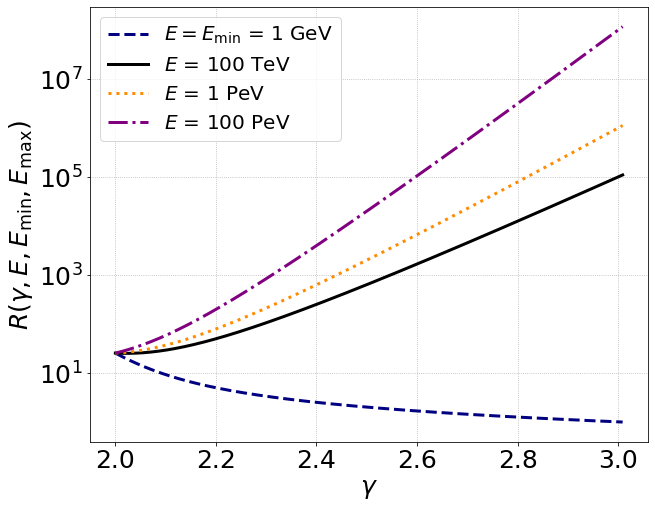

In [12]:
plt.figure(figsize=(10,8))
s_range = np.arange(2,3.01,0.001)
Rp = np.vectorize(Rp)


plt.plot(s_range, Rp(1,1,1e11,s_range),'--', label = '$E=E_{\min}$ = 1 GeV',linewidth = 3,c='navy')
plt.plot(s_range, Rp(1e5,1,1e11,s_range), label= '$E$ = 100 TeV',linewidth = 3,c='black')
plt.plot(s_range, Rp(1e6,1,1e11,s_range),linestyle = 'dotted', label= '$E$ = 1 PeV',linewidth = 3,c='darkorange')
plt.plot(s_range, Rp(1e8,1,1e11,s_range),linestyle = 'dashdot', label= '$E$ = 100 PeV',linewidth = 3,c='purple')

plt.legend(fontsize = 20)
plt.yscale('log')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('$\\gamma$',fontsize = 25)
plt.ylabel('$R(\\gamma, E, E_{\\min}, E_{\\max})$',fontsize = 25)
plt.grid(ls='dotted')


PhD thesis of M. Vereecken: R=200 for $\alpha = 2.2$ and $E = 100$ PeV. This is confirmed by the above plot.

In [13]:
Rp(E=1,Emin=60e3,Emax=1e8,s=2)

array(7.4185809)

# Estimating the diffuse neutrino flux

\begin{equation}
    E^{2}_{\nu_{}}\Phi_{\nu_i} \approx \frac{1}{3}\frac{c}{4\pi} t_{H} \xi_{z}\frac{3K}{4(1+K)} \min[1,f_{\mathrm{pp}/p\gamma}] \left(E_{\mathrm{CR}}\mathcal{Q}_{E_\mathrm{CR}}\right)~.
\end{equation}

In [14]:
help(nuflux)

Help on function nuflux in module diffuse_lirg_extrapolation:

nuflux(E, Emin, Emax, alpha, DL_compl, xiz, eta, fpp, channel, agncorr, df)
    Computes the diffuse neutrino flux (per flavor) from starburst galaxies.
    
    Parameters:
    - E (float): Neutrino energy at which to evaluate the flux [GeV].
    - Emin, Emax (float): Minimum and maximum proton energies [same units as E].
    - alpha (float): Proton spectral index.
    - DL_compl (float): Completeness distance in Mpc.
    - xiz (float): Redshift evolution factor (ξ_z).
    - eta (float): Energy conversion efficiency from IR to CR.
    - fpp (float): Proton-to-pion conversion efficiency.
    - channel (str): Interaction channel, 'pp' or 'pγ'.
    - agncorr (str): AGN luminosity correction: 'yes' or 'no'.
    
    Returns:
    - Neutrino flux per flavor: φ(E) in units of [GeV-1 cm-2 s-1 sr-1]



In [15]:
Emin = 60e3#1e3
Emax = 1e8#60*1e6
eta_tot = ((1e51*0.1*5.97e-46*(u.erg/u.yr)).to(u.erg/u.s)).value #BH cutoff mass standard SB99 
print('eta_tot = ', eta_tot)
diffuse_lirg_flux = [nuflux(E=0, #gamma=2 does not matter
                            Emin=Emin, 
                            Emax=Emax, 
                            alpha=2,
                            DL_compl=i,
                            xiz= xi(2,4,'ULIRG'),
                            eta= eta_tot,
                            fpp=1,
                            channel='pp',
                            agncorr='no', df=df
                            ) for i in Dmax_range_LIRG ]


eta_tot =  0.0018917788424975283


(-4.00952582288444e-09, 2.374459979670569e-07)

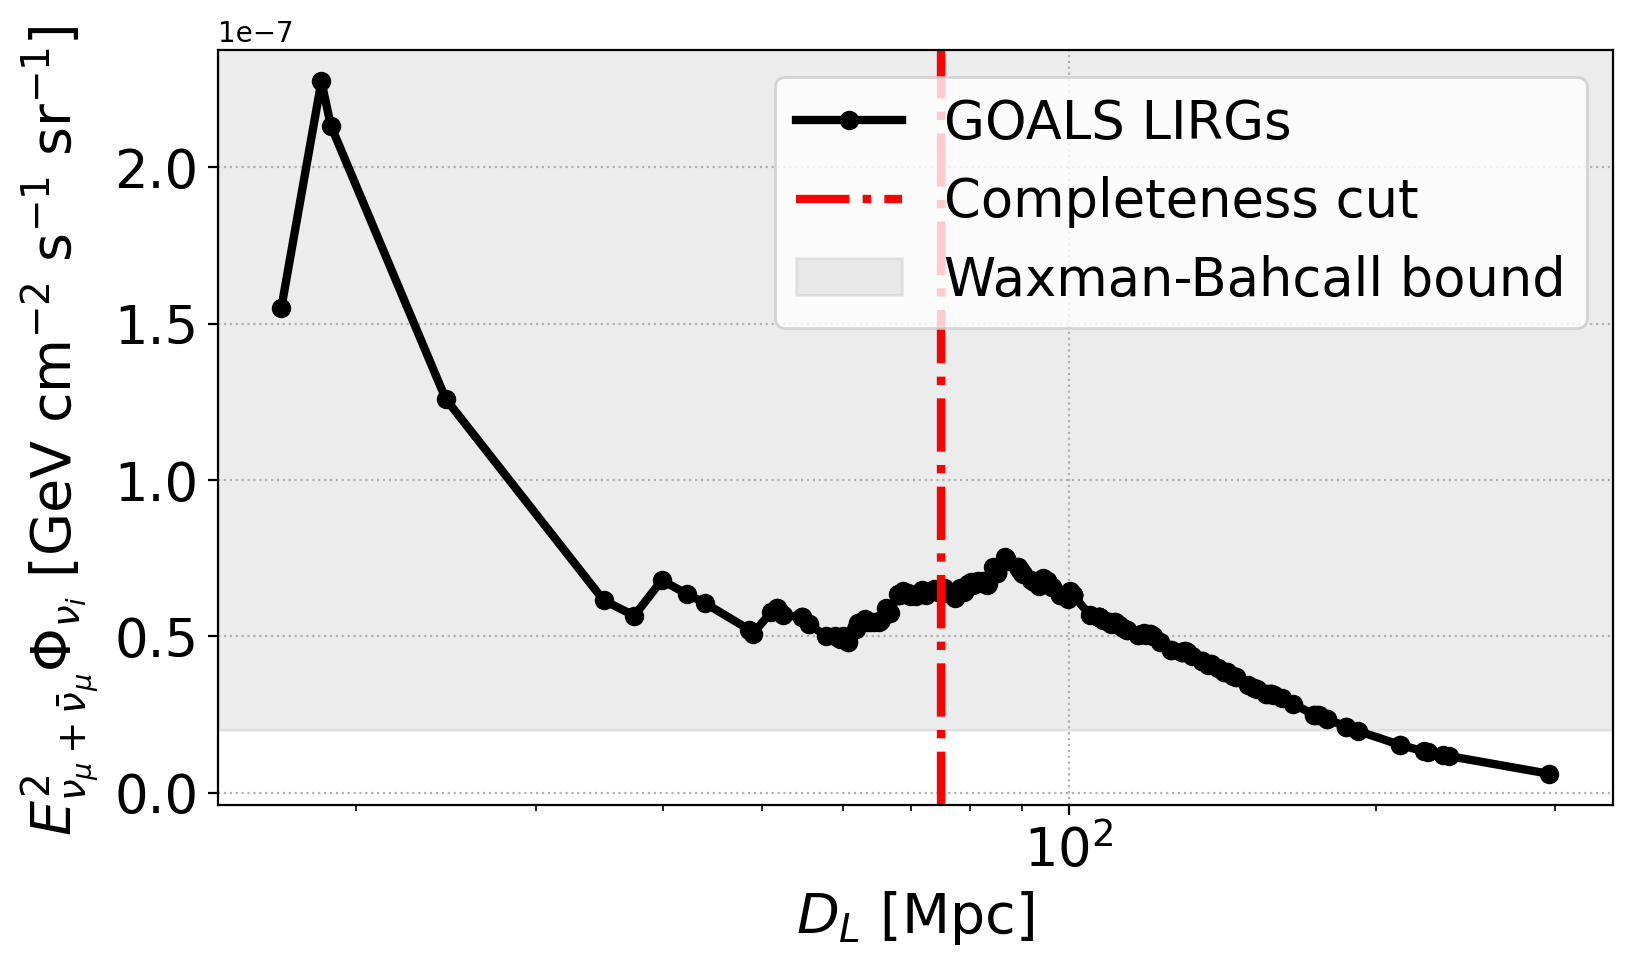

In [16]:
plt.figure(figsize=(9,5),dpi=200)

plt.plot(Dmax_range_LIRG,diffuse_lirg_flux,linewidth = 3, label = 'GOALS LIRGs',c='k',marker='o')
plt.axhspan(2 * 1e-8 , 1e-5, 
            alpha=0.15, color='grey', label='Waxman-Bahcall bound')
plt.axvline(x = 75, linestyle = 'dashdot',c = 'r', label = 'Completeness cut', linewidth = 3)
#plt.yscale('log')
plt.xlabel('$D_L$ [Mpc]',fontsize = 20)
plt.ylabel('$E^{2}_{\\nu_{\\mu}+\\bar{\\nu}_\mu}\Phi_{\\nu_i}$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$] ',fontsize = 20)
plt.yticks(fontsize = 19)
plt.xticks(fontsize = 19)
plt.legend(fontsize = 19)
plt.grid(ls='dotted')
plt.xscale('log')
plt.ylim(min(diffuse_lirg_flux)-1e-8,max(diffuse_lirg_flux)+1e-8)


In the paper we present the diffuse neutrino flux from the LIRG population for specific values, computed with the code below

In [17]:
print(normalizing_factor(3.4,1/25,1,eta_tot, QIR(75,'no',df)[0]))

Qir converted to [erg Mpc-3 yr-1]: 6.2213173960085935e+47 erg / (Mpc3 yr)
eta_tot * Qir_density: 7.922946549880088e-34 GeV / (cm3 s)
1.953906486921294e-08 GeV / (cm2 s sr)


In [18]:
print(normalizing_factor(3.4,1/7,1,eta_tot, QIR(75,'no',df)[0]))

Qir converted to [erg Mpc-3 yr-1]: 6.2213173960085935e+47 erg / (Mpc3 yr)
eta_tot * Qir_density: 7.922946549880088e-34 GeV / (cm3 s)
6.978237453290334e-08 GeV / (cm2 s sr)


As such we find that for a completeness distance of $D_L \approx 75$ Mpc the IR generation rate is $\mathcal{Q}_{\rm IR} \approx 10^{47.79}$ erg Mpc$^{-3}$ s$^{-1}$. 

# Comparing to the IceCube diffuse measurements

First we perform a fit to the IceCube data using the expression: 

\begin{equation}
    E^{2}_{\nu_{}}\Phi_{\nu_i} \approx \frac{1}{3}\frac{c}{4\pi} t_{H} \xi_{z}\frac{3K}{4(1+K)} \min[1,f_{\mathrm{pp}/p\gamma}] \left(E_{\mathrm{CR}}\mathcal{Q}_{E_\mathrm{CR}}\right)~.
\end{equation}

In this fit the parameter $\eta_{tot}$ and the spectral index $\gamma$ are the fit parameters. For this we use $\xi(\gamma = 2.37,z=4)$ as fixed parameter in the equation. As the fit of $\gamma$ is independent of the value of $\xi$ we decided to take $\xi(\gamma = 2.37,z=4)$ for consistency. Moreover, for $E_{min}$ and $E_{max}$ we used the 20 times the lowerst and highest value for the energy range of the observed muon neutrinos. 

This plot shows the fitted $\hat{\eta}_{\rm tot,fit}$ for a range of fixed $f_{pp}$ values. The black solid line shows the fit for a redshift parameter consistent with a ULIRG evolution up to redshift 1 and the red dashed line up to $z=4$. In the fit, the spectral index is also a free parameter and is found to be $\hat{\gamma} = 2.37$. I made this plot to investigate the range of the $\eta_{tot}$ parameter and more specifically the effect of the extrapolation only being justified up to a certain redshift.

As follow-up I should also check the effect of changing Emin and Emax.

In [19]:
fpp_fit_range_z34, fitted_eta_tot_z34= fit_eta_vs_fpp(nuflux_fit,
                                              energy_range_numu,flux_numu * energy_range_numu**2
                                             , xi=3.4)

fpp_fit_range_z2, fitted_eta_tot_z2= fit_eta_vs_fpp(nuflux_fit,
                                              energy_range_numu,flux_numu * energy_range_numu**2
                                             , xi=2)

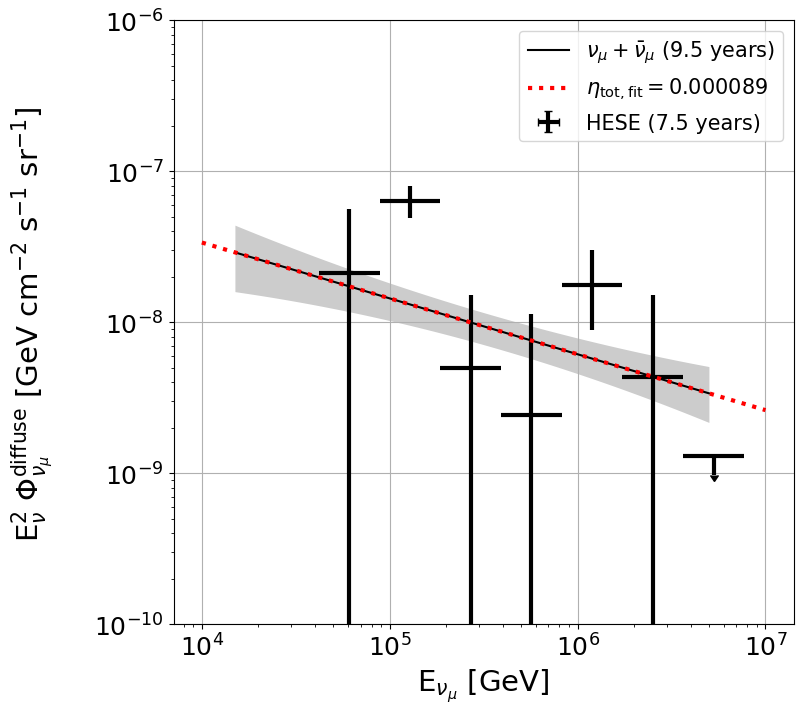

In [20]:
# Plot the HESE data up to index i
i = len(energy)
fig=plt.figure(figsize=(8,8), dpi= 100, facecolor='w', edgecolor='k')
Energy_plot = np.logspace(np.log10(1e4),np.log10(1e7),12)
Energy_plots =  np.logspace(np.log10(1e3),np.log10(5e5),12)
diffuse_LIRG_flux = [nuflux(i,energy_range_numu[0]*20, energy_range_numu[-1]*20, 2.37,75,3.4,1,fitted_eta_tot_z34[-1],'pp','no',df) for i in Energy_plot]

HESE = plt.errorbar(energy[:i],
                   flux[:i],
                   xerr=[energy_lower_err[:i],energy_upper_err[:i]],
                   yerr=[flux_lower_err[:i],flux_upper_err[:i]],
                   uplims=upper_limits[:i],
                   marker="o",
                   markersize=0,
                   color="k",
                   linestyle="none",
                   linewidth=3,
                   capsize=0, label = 'HESE (7.5 years)')



# Plot the diffuse nu_mu best fit
plt.xscale('log')
plt.yscale('log')
numu_best = plt.plot(energy_range_numu,
                    flux_numu*energy_range_numu**2,
                    color="k",
                    linestyle='-', label= '$\\nu_\\mu + \\bar{\\nu}_{\\mu}$ (9.5 years)') # dashdotdotted




plt.plot(Energy_plot, diffuse_LIRG_flux, linewidth = 3,c='r', ls='dotted',label='$\eta_{\\rm tot, fit} = $'+f'{fitted_eta_tot_z34[-1]:.6f}')


# Plot the error band of the diffuse nu_mu best fit



numu_err = plt.fill_between(energy_numu,
                           flux_lower,
                           flux_upper,
                           color="grey",
                           lw=0,
                           alpha=0.4)


plt.ylim(1e-10,1e-6)
#plt.xlim(1e4,4e7)
plt.xlabel ("E$_{\\nu_\\mu}$ [GeV]", fontsize = 21)
plt.ylabel('E$_{\\nu}^2$ $\\Phi ^{\\mathrm{diffuse}}_{\\nu_\\mu}$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$] \n', fontsize = 21)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize = 15)
plt.grid()


# Cross check

To cross check the above results we check wether we find the same results if we use a scaling of the uncorrected supernova rate obtained from the dataframe vs applying a conversion factor to the IR luminosity density. This seems like a trivial idea but it checks if a mistake was made in the code.



In [21]:
def nuflux_check(DLcompl,df,E, Emin, Emax, s, zmax):
    tH = (pow(cosmo.H(0),-1)).to((u.Mpc*u.s)/u.Mpc) #inverse of Hubble parameter in seconds
    ctH = (const.c).to(u.cm/u.s)*tH # unit: cm
    df_test = df[(df['D_L [Mpc]'] < DLcompl) & (df['log(LIR)'] < 12) ]
    ESN = 1e51
    etaSN = 0.1
    V = (4/3)*np.pi*pow(DLcompl,3)
    LCR_test = np.sum(df_test['un-corr Supernova rate [yr$^{-1}$] '])*ESN*etaSN
    QCR_test = ((LCR_test/V)*(u.erg*pow(u.yr,-1)*pow(u.Mpc,-3))).to(u.GeV*pow(u.s,-1)*pow(u.cm,-3))
    return xi(s,zmax,'ULIRG')*pow(Rp(E, Emin, Emax, s),-1)*(1/6)*(ctH/(4*np.pi*u.sr))*QCR_test

    

In [22]:
kwargs_Rp = {'E':200,"Emin":1, "Emax":1e11,"s":2, "zmax":4}
nuflux_check(75,df, **kwargs_Rp)

<Quantity 1.92647013e-08 GeV / (cm2 s sr)>

In [23]:
result = (((pow(10,11.11)*u.solLum).to(u.erg*u.s**-1)).value*5.97e-46*0.1
          *1e51*u.erg)/((pow(10,11.11)*u.solLum).to(u.erg*u.yr**-1).value)
result

<Quantity 0.00189178 erg>